In [1]:
import pandas as pd
import numpy as np

### Load data

In [2]:
df = pd.read_csv('/Users/chenjiqing/Public/bladder cancer/ML used/NMIBC_Nolimit10year_withStd.csv')
df

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,...,Bcell,NLR,SurgToBlood,survreftmd,Death,OutcomeTime,Outcome,TenDead,TenRFS,SurgToBlood_std
0,69,male,Grade 3 + 4,ever-smoker,With Immuno,0.709876,-0.565220,-0.146588,-1.292420,-0.819017,...,-0.296761,0.547451,757.0,53.322382,1,4.109589,1,1,1,1.145645
1,67,male,Grade 1 + 2,ever-smoker,Without Immuno,0.899912,0.135156,-0.051655,0.272530,-1.188296,...,-0.038991,-0.550924,739.0,98.299795,1,98.299795,1,1,1,1.087814
2,69,female,Grade 1 + 2,non-smoker,With Immuno,-0.145288,-0.565220,-0.383920,0.334508,1.711999,...,-0.480884,-0.474889,212.0,182.833676,1,182.833676,1,0,0,-0.605357
3,63,male,Grade 1 + 2,ever-smoker,Without Immuno,-1.095471,-0.565220,0.090745,1.357149,-1.026477,...,-0.112639,-0.704349,650.0,127.211499,1,28.043836,1,0,1,0.801870
4,61,male,Grade 1 + 2,ever-smoker,Without Immuno,2.595037,0.555382,1.704606,0.226046,-0.653049,...,1.433986,-0.449725,571.0,58.546201,1,58.546201,1,1,1,0.548055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,61,male,Grade 1 + 2,ever-smoker,Without Immuno,-0.525361,-0.565220,-0.621253,-0.672638,0.259777,...,-0.665006,0.166480,134.0,133.000000,0,133.000000,0,0,0,-0.855959
599,60,female,Grade 1 + 2,non-smoker,Without Immuno,0.424821,3.076737,1.609673,1.682535,1.089618,...,2.023177,-0.805407,815.0,142.000000,0,4.800000,1,0,1,1.331990
600,50,male,Grade 1 + 2,non-smoker,Without Immuno,0.519839,-0.144994,2.938735,-0.176812,0.176793,...,2.207299,-0.456198,78.0,130.000000,0,130.000000,0,0,0,-1.035878
601,67,male,Grade 3 + 4,ever-smoker,Without Immuno,1.470022,-0.565220,0.850209,0.210552,0.301269,...,0.476551,-0.391391,381.0,180.172485,1,180.172485,1,0,0,-0.062386


In [3]:
df.columns

Index(['Age', 'Sex', 'TumorGrade', 'SmokingStat', 'BCGtrt', 'Bas', 'Bmem',
       'Bnv', 'CD4mem', 'CD4nv', 'CD8mem', 'CD8nv', 'Eos', 'Mono', 'Neu', 'NK',
       'Treg', 'CD4', 'CD8', 'Bcell', 'NLR', 'SurgToBlood', 'survreftmd',
       'Death', 'OutcomeTime', 'Outcome', 'TenDead', 'TenRFS',
       'SurgToBlood_std'],
      dtype='object')

### remove the variables that are not used in training

In [4]:
df.drop(['Eos','CD4', 'CD8', 'Bcell','NLR','survreftmd','Death', 'Outcome','TenRFS', 'OutcomeTime','SurgToBlood'],axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'TumorGrade', 'SmokingStat', 'BCGtrt', 'Bas', 'Bmem',
       'Bnv', 'CD4mem', 'CD4nv', 'CD8mem', 'CD8nv', 'Mono', 'Neu', 'NK',
       'Treg', 'TenDead', 'SurgToBlood_std'],
      dtype='object')

In [5]:
df.dtypes

Age                  int64
Sex                 object
TumorGrade          object
SmokingStat         object
BCGtrt              object
Bas                float64
Bmem               float64
Bnv                float64
CD4mem             float64
CD4nv              float64
CD8mem             float64
CD8nv              float64
Mono               float64
Neu                float64
NK                 float64
Treg               float64
TenDead              int64
SurgToBlood_std    float64
dtype: object

### Although it is ok to have whitespace in the value in 'grade2', and 'ImmunoTx'for XGBoost and classification, we can't have any whitespace if we want to draw a tree.

In [6]:
df.replace(' ','_',regex=True, inplace=True)
df.head()

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,TenDead,SurgToBlood_std
0,69,male,Grade_3_+_4,ever-smoker,With_Immuno,0.709876,-0.565220,-0.146588,-1.292420,-0.819017,-0.291996,-0.929754,1.529449,0.316213,0.557144,-0.514317,1,1.145645
1,67,male,Grade_1_+_2,ever-smoker,Without_Immuno,0.899912,0.135156,-0.051655,0.272530,-1.188296,1.528610,-0.929754,0.289342,-0.505496,1.091012,-0.514317,1,1.087814
2,69,female,Grade_1_+_2,non-smoker,With_Immuno,-0.145288,-0.565220,-0.383920,0.334508,1.711999,0.280194,-0.513964,-0.428614,-0.153335,-0.510592,-0.514317,0,-0.605357
3,63,male,Grade_1_+_2,ever-smoker,Without_Immuno,-1.095471,-0.565220,0.090745,1.357149,-1.026477,2.334879,-0.513964,-1.440280,-0.614499,0.023276,-0.514317,0,0.801870
4,61,male,Grade_1_+_2,ever-smoker,Without_Immuno,2.595037,0.555382,1.704606,0.226046,-0.653049,-0.838178,-0.098174,1.627352,-0.715116,-0.704726,1.251034,1,0.548055


### The columns of data that we will use to make classifications

In [7]:
X = df.drop('TenDead',axis=1).copy()
X.head()

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,SurgToBlood_std
0,69,male,Grade_3_+_4,ever-smoker,With_Immuno,0.709876,-0.565220,-0.146588,-1.292420,-0.819017,-0.291996,-0.929754,1.529449,0.316213,0.557144,-0.514317,1.145645
1,67,male,Grade_1_+_2,ever-smoker,Without_Immuno,0.899912,0.135156,-0.051655,0.272530,-1.188296,1.528610,-0.929754,0.289342,-0.505496,1.091012,-0.514317,1.087814
2,69,female,Grade_1_+_2,non-smoker,With_Immuno,-0.145288,-0.565220,-0.383920,0.334508,1.711999,0.280194,-0.513964,-0.428614,-0.153335,-0.510592,-0.514317,-0.605357
3,63,male,Grade_1_+_2,ever-smoker,Without_Immuno,-1.095471,-0.565220,0.090745,1.357149,-1.026477,2.334879,-0.513964,-1.440280,-0.614499,0.023276,-0.514317,0.801870
4,61,male,Grade_1_+_2,ever-smoker,Without_Immuno,2.595037,0.555382,1.704606,0.226046,-0.653049,-0.838178,-0.098174,1.627352,-0.715116,-0.704726,1.251034,0.548055


### Turn categorical variable into continuous variables for XGBoost requirement

In [8]:
X2 = X.assign(Sex = np.where(X['Sex']=='male',0,1),
             TumorGrade = np.where(X['TumorGrade']=='Grade_1_+_2',0,1),
             SmokingStat = np.where(X['SmokingStat']=='non-smoker',0,1),
             BCGtrt = np.where(X['BCGtrt']=='Without_Immuno',0,1)).copy()
X2.head()

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,SurgToBlood_std
0,69,0,1,1,1,0.709876,-0.565220,-0.146588,-1.292420,-0.819017,-0.291996,-0.929754,1.529449,0.316213,0.557144,-0.514317,1.145645
1,67,0,0,1,0,0.899912,0.135156,-0.051655,0.272530,-1.188296,1.528610,-0.929754,0.289342,-0.505496,1.091012,-0.514317,1.087814
2,69,1,0,0,1,-0.145288,-0.565220,-0.383920,0.334508,1.711999,0.280194,-0.513964,-0.428614,-0.153335,-0.510592,-0.514317,-0.605357
3,63,0,0,1,0,-1.095471,-0.565220,0.090745,1.357149,-1.026477,2.334879,-0.513964,-1.440280,-0.614499,0.023276,-0.514317,0.801870
4,61,0,0,1,0,2.595037,0.555382,1.704606,0.226046,-0.653049,-0.838178,-0.098174,1.627352,-0.715116,-0.704726,1.251034,0.548055


In [9]:
X2.dtypes

Age                  int64
Sex                  int64
TumorGrade           int64
SmokingStat          int64
BCGtrt               int64
Bas                float64
Bmem               float64
Bnv                float64
CD4mem             float64
CD4nv              float64
CD8mem             float64
CD8nv              float64
Mono               float64
Neu                float64
NK                 float64
Treg               float64
SurgToBlood_std    float64
dtype: object

In [10]:
X2.describe()

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,SurgToBlood_std
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,598.000000
mean,63.159204,0.242123,0.250415,0.829187,0.147595,0.015187,0.017855,0.044853,0.028976,0.028295,-0.005245,0.032277,-0.012918,-0.031653,0.004975,-0.008816,0.031802
std,9.727749,0.428724,0.433611,0.376658,0.354993,0.985828,1.011889,0.999937,0.998433,1.010356,0.985371,1.007630,0.996573,0.983215,0.979460,0.984951,1.020017
min,29.000000,0.000000,0.000000,0.000000,0.000000,-1.665580,-0.565220,-1.618049,-1.540333,-1.188296,-1.150282,-1.102010,-2.125602,-2.352330,-1.820995,-0.514317,-1.537083
25%,57.000000,0.000000,0.000000,1.000000,0.000000,-0.620380,-0.565220,-0.668719,-0.695880,-0.694541,-0.734143,-0.751558,-0.722324,-0.614499,-0.704726,-0.514317,-0.737887
50%,66.000000,0.000000,0.000000,1.000000,0.000000,-0.050270,-0.565220,-0.099121,-0.130328,-0.196636,-0.318005,-0.216971,-0.004367,-0.010794,-0.170858,-0.514317,-0.274434
75%,71.000000,0.000000,0.500000,1.000000,0.000000,0.709876,0.275231,0.565410,0.551432,0.508729,0.592298,0.555211,0.648320,0.672567,0.557144,0.074133,0.509501
max,79.000000,1.000000,1.000000,1.000000,1.000000,2.595037,3.555795,2.938735,2.709204,3.039745,2.842568,2.752959,2.443212,2.613646,2.907134,3.408687,4.464517


In [11]:
print(X2.isnull().sum())

Age                0
Sex                0
TumorGrade         0
SmokingStat        0
BCGtrt             0
Bas                0
Bmem               0
Bnv                0
CD4mem             0
CD4nv              0
CD8mem             0
CD8nv              0
Mono               0
Neu                0
NK                 0
Treg               0
SurgToBlood_std    5
dtype: int64


## Some missing values in 'SurgToBlood'. Using RandomForest to fit missing values

In [12]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_BD(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    BD_df = df[['SurgToBlood_std','Age', 'Bas', 'Bmem','Bnv', 
                'CD4mem','CD4nv', 'CD8mem','CD8nv', 'Mono', 'Neu', 'NK','Treg']]

    # NMIBC patients 分成已知 BD time和未知 BD time 两部分
    known_BD = BD_df[BD_df.SurgToBlood_std.notnull()].values
    unknown_BD = BD_df[BD_df.SurgToBlood_std.isnull()].values

    # y即目标 BD time
    y = known_BD[:, 0]

    # X即特征属性值
    X = known_BD[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedBD = rfr.predict(unknown_BD[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.SurgToBlood_std.isnull()), 'SurgToBlood_std' ] = predictedBD 

    return df, rfr

X3, rfr = set_missing_BD(X2)

### The column of data that we want to predict.

In [13]:
#y = df.assign(RecOrProg = np.where(df['RecOrProg']=='yes',1,0))['RecOrProg'].copy()
y = df['TenDead'].copy()
y.head()

0    1
1    1
2    0
3    0
4    1
Name: TenDead, dtype: int64

### Now we simply split the data into training and testing sets and build the model. However, first, let's observe that this data is imbalanced by dividing the number of people who has tumor recurrence or progression, where y =1, by the total number of people in the dataset.

In [14]:
sum(y)/len(y)

0.29850746268656714

### 30% of the NMIBC patients in the dataset have deceased within 10 year. We can split using stratification in order to maintain tha same percentage of NmIBC patients who have tumor recurrence or progression in both the training set and the testing set.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3,y,random_state=40,stratify = y,test_size=0.2)

In [16]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.2987551867219917
0.2975206611570248


In [17]:
import xgboost as xgb
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [18]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',missing=None,seed=1)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.72157
[1]	validation_0-auc:0.78431
[2]	validation_0-auc:0.80229
[3]	validation_0-auc:0.79902
[4]	validation_0-auc:0.77337
[5]	validation_0-auc:0.77941
[6]	validation_0-auc:0.76177
[7]	validation_0-auc:0.78693
[8]	validation_0-auc:0.77092
[9]	validation_0-auc:0.77026
[10]	validation_0-auc:0.77320
[11]	validation_0-auc:0.77222
[12]	validation_0-auc:0.77092


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

### How it performms on the testing Dataset by running the Testing Dataset down the model and drawing a Confusion Matrix

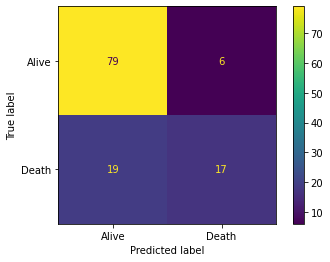

In [19]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### 53 NMIBC patients who alived, 36 (68%) were correctly classified. And of the 68 NMIBC patients that deceased, 53 (78%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die, we would like to capture mmore of the NMIBC patients that deceased. XGBoost has a parameter, scale_pos_weight, that helps with imbalanced data.

# Optimize Parameters using Cross Validation and GridSearch()

In [25]:
# Round 1
param_grid = {
    'max_depth':[2,3,4,5,6,7],
    'learning_rate':[0.2,0.1,0.05,0.01],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[1.0,5.0,10,25,30,35],
    'scale_pos_weight':[0.423,1,2.36,3]
}

## To speed up cross validation, and to further prevent overfitting. We are only using a random subset of the data (90%) and are only using a random subset of the features (columns) (50%) per tree.

In [26]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params.best_params_)
print(optimal_params.best_score_)

[0]	validation_0-auc:0.68922
[1]	validation_0-auc:0.70637
[2]	validation_0-auc:0.69837
[3]	validation_0-auc:0.72712
[4]	validation_0-auc:0.74804
[5]	validation_0-auc:0.76307
[6]	validation_0-auc:0.76503


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-auc:0.76716
[8]	validation_0-auc:0.77533
[9]	validation_0-auc:0.78399
[10]	validation_0-auc:0.79052
[11]	validation_0-auc:0.79085
[12]	validation_0-auc:0.79183
[13]	validation_0-auc:0.78464
[14]	validation_0-auc:0.78399
[15]	validation_0-auc:0.78137
[16]	validation_0-auc:0.78105
[17]	validation_0-auc:0.78203
[18]	validation_0-auc:0.78562
[19]	validation_0-auc:0.78399
[20]	validation_0-auc:0.78497
[21]	validation_0-auc:0.78431
[22]	validation_0-auc:0.78693
{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 35, 'scale_pos_weight': 2.36}
0.7396632816791152


### first round: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 35, 'scale_pos_weight': 2.36}

In [27]:
# Round 2
param_grid2 = {
    'max_depth':[2,4,5,6],
    'learning_rate':[0.15,0.1,0.05],
    'gamma':[0.1,0.3,0.5,0.6],
    'reg_lambda':[25,30,35,40],
    'scale_pos_weight':[2.36]
}

In [28]:
optimal_params2 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 41,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid2,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params2.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])
print(optimal_params2.best_params_)
print(optimal_params2.best_score_)

[0]	validation_0-auc:0.59706
[1]	validation_0-auc:0.65343
[2]	validation_0-auc:0.73823
[3]	validation_0-auc:0.76128
[4]	validation_0-auc:0.75931
[5]	validation_0-auc:0.77320


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[6]	validation_0-auc:0.77288
[7]	validation_0-auc:0.77451
[8]	validation_0-auc:0.77288
[9]	validation_0-auc:0.77712
[10]	validation_0-auc:0.78105
[11]	validation_0-auc:0.77745
[12]	validation_0-auc:0.78007
[13]	validation_0-auc:0.78333
[14]	validation_0-auc:0.77941
[15]	validation_0-auc:0.78562
[16]	validation_0-auc:0.79379
[17]	validation_0-auc:0.79281
[18]	validation_0-auc:0.79085
[19]	validation_0-auc:0.78627
[20]	validation_0-auc:0.78791
[21]	validation_0-auc:0.78856
[22]	validation_0-auc:0.78693
[23]	validation_0-auc:0.79150
[24]	validation_0-auc:0.78791
[25]	validation_0-auc:0.78301
[26]	validation_0-auc:0.78399
{'gamma': 0.6, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 35, 'scale_pos_weight': 2.36}
0.7400774218591194


### second round: {'gamma': 0.6, 'learning_rate': 0.15, 'max_depth': 6, 'reg_lambda': 35, 'scale_pos_weight': 2.36}

# Building, Evaluating, Drawing, and interpreting the optimal XGBoost model

In [20]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=41,
                            gamma=0.6, learning_rate = 0.15, max_depth = 6,
                            reg_lambda=35, scale_pos_weight =2.37)
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.74134
[1]	validation_0-auc:0.75948
[2]	validation_0-auc:0.76323
[3]	validation_0-auc:0.76046
[4]	validation_0-auc:0.76013
[5]	validation_0-auc:0.76323
[6]	validation_0-auc:0.77680
[7]	validation_0-auc:0.77860
[8]	validation_0-auc:0.78382
[9]	validation_0-auc:0.77990
[10]	validation_0-auc:0.78709
[11]	validation_0-auc:0.78677
[12]	validation_0-auc:0.79118
[13]	validation_0-auc:0.79477
[14]	validation_0-auc:0.79444
[15]	validation_0-auc:0.79902
[16]	validation_0-auc:0.79967


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-auc:0.80327
[18]	validation_0-auc:0.80327
[19]	validation_0-auc:0.80752
[20]	validation_0-auc:0.80588
[21]	validation_0-auc:0.80784
[22]	validation_0-auc:0.80915
[23]	validation_0-auc:0.81209
[24]	validation_0-auc:0.81078
[25]	validation_0-auc:0.81144
[26]	validation_0-auc:0.81209
[27]	validation_0-auc:0.80948
[28]	validation_0-auc:0.81438
[29]	validation_0-auc:0.81471
[30]	validation_0-auc:0.81144
[31]	validation_0-auc:0.81340
[32]	validation_0-auc:0.81242
[33]	validation_0-auc:0.81078
[34]	validation_0-auc:0.81176
[35]	validation_0-auc:0.81242
[36]	validation_0-auc:0.81144
[37]	validation_0-auc:0.80980
[38]	validation_0-auc:0.81144


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=41,
              reg_alpha=0, reg_lambda=35, scale_pos_weight=2.37, seed=41,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
clf_xgb.best_ntree_limit

30

## Refit the classifier with the number of trees from the best round.

In [22]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=41,
                            gamma=0.6, learning_rate = 0.15, max_depth = 6,
                            reg_lambda=35, scale_pos_weight =2.37,n_estimators=30)
clf_xgb.fit(X_train,
            y_train)

[00:10:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, random_state=41,
              reg_alpha=0, reg_lambda=35, scale_pos_weight=2.37, seed=41,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [23]:
y_pred = clf_xgb.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,y_pred)

0.8147058823529412

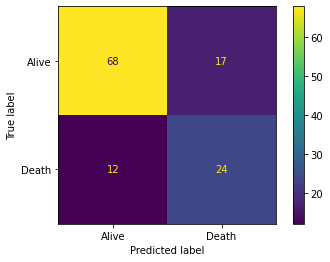

In [24]:
plot_confusion_matrix(clf_xgb,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### 85 NMIBC patients who alived, 68 (80%) were correctly classified. And of the 36 NMIBC patients that deceased, 24 (67%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die, we would like to capture mmore of the NMIBC patients that deceased. Using SMOTE!!

In [25]:
clf_xgb.feature_importances_

array([0.17928138, 0.08399045, 0.04752323, 0.02341371, 0.        ,
       0.06563538, 0.02911885, 0.04896479, 0.10316749, 0.06196056,
       0.04891109, 0.05146962, 0.04363473, 0.07960811, 0.05012164,
       0.03442736, 0.0487716 ], dtype=float32)

In [26]:
clf_xgb.importance_type

'gain'

In [27]:
clf_xgb.score(X_test, y_test)

0.7603305785123967

## Explain the model's predictions on the entire dataset

In [28]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_train)

In [47]:
print(shap_values.shape)
print(X_train.shape)
shap_values[1]

(482, 17)
(482, 17)


array([-0.9185043 ,  0.03494725, -0.03989918,  0.01535808,  0.        ,
       -0.13215631, -0.01986765, -0.14395534, -0.17454453, -0.16365288,
        0.05956252, -0.09577671, -0.05381244, -0.0964224 , -0.06211031,
       -0.00642334,  0.16106309], dtype=float32)

## SHAP Summary Plot

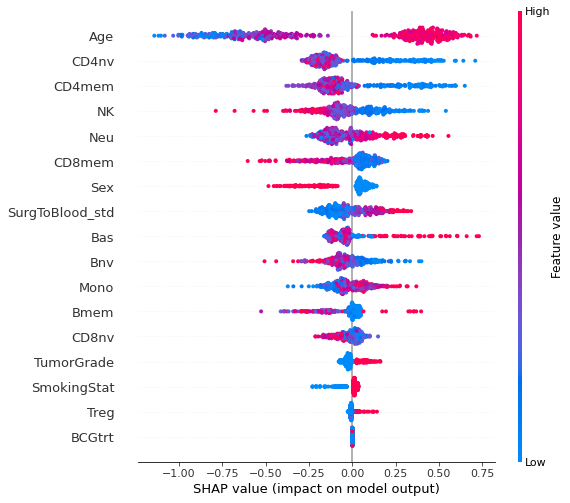

In [29]:
shap.summary_plot(shap_values, X_train)

## SHAP Dependence Plots

In [30]:
X_train.head(11)

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,SurgToBlood_std
394,58,0,0,1,1,1.660058,0.975608,0.565410,-0.455714,0.508729,-1.020239,-0.276369,-0.004367,-0.505496,2.013148,3.212536,-0.268008
424,50,0,0,1,0,0.139766,-0.004919,1.799539,0.396487,1.546031,-0.604100,2.455966,-1.016033,-0.572575,0.265943,-0.514317,0.599461
503,69,0,0,0,0,-0.335325,-0.144994,-0.763652,0.303519,0.591713,0.098134,-0.395167,-1.897162,0.165287,0.945412,0.662584,0.673357
523,57,1,1,1,0,-0.620380,-0.565220,-0.478853,-1.214948,0.135301,-0.708135,-0.157572,1.235739,0.752222,-0.995927,0.270283,-0.525036
486,64,0,0,1,0,-1.000453,-0.565220,-0.194054,1.558579,1.214094,1.190498,1.386791,-1.929796,-0.882812,-0.898860,-0.514317,-0.900939
52,67,0,0,1,0,2.595037,-0.565220,0.612876,-0.719122,-0.155144,-0.812169,-0.632761,1.333643,0.123363,0.702745,-0.514317,-0.698529
165,68,0,0,1,0,-0.145288,-0.565220,-0.383920,0.350003,0.342761,0.956420,-0.870356,1.170471,-0.866042,-0.122324,-0.514317,-0.721019
356,73,0,0,1,0,-0.145288,-0.425145,0.375544,0.969785,0.384253,-0.760152,0.792805,0.485149,-0.480342,-0.073791,-0.514317,-1.042304
438,74,0,0,1,0,2.515222,-0.565220,-0.953518,-0.502198,-0.943493,-0.864187,-0.276369,0.778858,0.282674,0.751278,0.662584,0.933597
8,70,1,0,1,0,0.329803,0.135156,-0.146588,0.086595,1.338571,-0.968221,0.377015,2.443212,-0.362955,-0.898860,0.270283,-0.933067


In [33]:
X_train2 = X_train.assign(Sex = np.where(X_train['Sex']==0,'male','female'),
             TumorGrade = np.where(X_train['TumorGrade']==0,'Grade 1+2','Grade 3+4'),
             SmokingStat = np.where(X_train['SmokingStat']==0,'non-smoker','ever-smoker'),
             BCGtrt = np.where(X_train['BCGtrt']==0,'Without BCG','With BCG')).copy()
X_train2.head(11)

,Age,Sex,TumorGrade,SmokingStat,BCGtrt,Bas,Bmem,Bnv,CD4mem,CD4nv,CD8mem,CD8nv,Mono,Neu,NK,Treg,SurgToBlood_std
394,58,male,Grade 1+2,ever-smoker,With BCG,1.660058,0.975608,0.565410,-0.455714,0.508729,-1.020239,-0.276369,-0.004367,-0.505496,2.013148,3.212536,-0.268008
424,50,male,Grade 1+2,ever-smoker,Without BCG,0.139766,-0.004919,1.799539,0.396487,1.546031,-0.604100,2.455966,-1.016033,-0.572575,0.265943,-0.514317,0.599461
503,69,male,Grade 1+2,non-smoker,Without BCG,-0.335325,-0.144994,-0.763652,0.303519,0.591713,0.098134,-0.395167,-1.897162,0.165287,0.945412,0.662584,0.673357
523,57,female,Grade 3+4,ever-smoker,Without BCG,-0.620380,-0.565220,-0.478853,-1.214948,0.135301,-0.708135,-0.157572,1.235739,0.752222,-0.995927,0.270283,-0.525036
486,64,male,Grade 1+2,ever-smoker,Without BCG,-1.000453,-0.565220,-0.194054,1.558579,1.214094,1.190498,1.386791,-1.929796,-0.882812,-0.898860,-0.514317,-0.900939
52,67,male,Grade 1+2,ever-smoker,Without BCG,2.595037,-0.565220,0.612876,-0.719122,-0.155144,-0.812169,-0.632761,1.333643,0.123363,0.702745,-0.514317,-0.698529
165,68,male,Grade 1+2,ever-smoker,Without BCG,-0.145288,-0.565220,-0.383920,0.350003,0.342761,0.956420,-0.870356,1.170471,-0.866042,-0.122324,-0.514317,-0.721019
356,73,male,Grade 1+2,ever-smoker,Without BCG,-0.145288,-0.425145,0.375544,0.969785,0.384253,-0.760152,0.792805,0.485149,-0.480342,-0.073791,-0.514317,-1.042304
438,74,male,Grade 1+2,ever-smoker,Without BCG,2.515222,-0.565220,-0.953518,-0.502198,-0.943493,-0.864187,-0.276369,0.778858,0.282674,0.751278,0.662584,0.933597
8,70,female,Grade 1+2,ever-smoker,Without BCG,0.329803,0.135156,-0.146588,0.086595,1.338571,-0.968221,0.377015,2.443212,-0.362955,-0.898860,0.270283,-0.933067


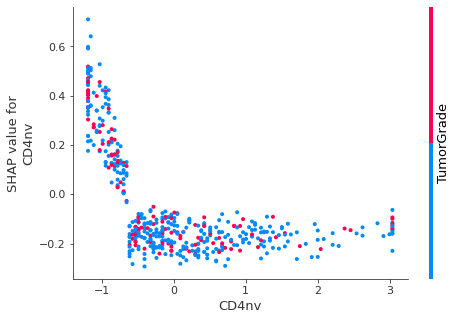

In [142]:
shap.dependence_plot("CD4nv", shap_values, X_train,interaction_index="TumorGrade",display_features=X_train2)

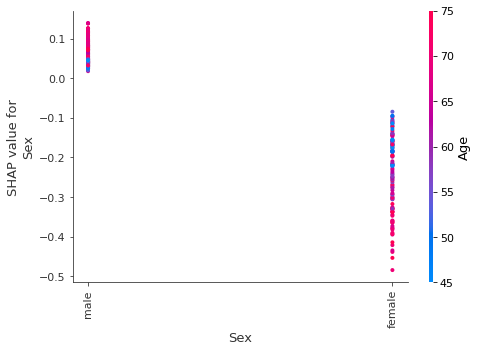

In [57]:
shap.dependence_plot("Sex", shap_values, X_train,display_features=X_train2)

## Local interpretability

In [51]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train2.iloc[0,:])

## Aggregated force_plot

In [52]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

# Use SMOTE to deal with imbalance class

In [58]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)

In [59]:
print(X)

     Age  Sex  TumorGrade  SmokingStat  BCGtrt       Bas      Bmem       Bnv  \
0     58    0           0            1       1  1.660058  0.975608  0.565410   
1     50    0           0            1       0  0.139766 -0.004919  1.799539   
2     69    0           0            0       0 -0.335325 -0.144994 -0.763652   
3     57    1           1            1       0 -0.620380 -0.565220 -0.478853   
4     64    0           0            1       0 -1.000453 -0.565220 -0.194054   
..   ...  ...         ...          ...     ...       ...       ...       ...   
671   51    0           0            0       0  0.253199 -0.565220 -0.761918   
672   63    0           0            1       0  1.433955 -0.379749  0.465210   
673   69    0           0            0       0  0.570888 -0.565220  1.211513   
674   62    0           0            1       0 -0.799467  0.032261 -1.126586   
675   65    0           0            1       0 -0.346547 -0.445734  0.251333   

       CD4mem     CD4nv    CD8mem     C

In [60]:
print(y)
print(sum(y)/len(y))

0      1
1      0
2      0
3      0
4      0
      ..
671    1
672    1
673    1
674    1
675    1
Name: TenDead, Length: 676, dtype: int64
0.5


In [66]:
# Round 1
param_grid = {
    'max_depth':[2,3,4,5,6,7],
    'learning_rate':[0.2,0.1,0.05,0.01],
    'gamma':[0,0.1,0.3,0.5,0.7],
    'reg_lambda':[1.0,5.0,10,25,30,35]
}

In [67]:
optimal_params3 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params3.fit(X,
                    y,
                    verbose = True,
                    early_stopping_rounds=10,
                    eval_metric='auc',
                    eval_set=[(X_test,y_test)])
print(optimal_params3.best_params_)
print(optimal_params3.best_score_)

[0]	validation_0-auc:0.71127
[1]	validation_0-auc:0.77043
[2]	validation_0-auc:0.75784
[3]	validation_0-auc:0.73971
[4]	validation_0-auc:0.76029
[5]	validation_0-auc:0.77288
[6]	validation_0-auc:0.77582
[7]	validation_0-auc:0.77484
[8]	validation_0-auc:0.77778
[9]	validation_0-auc:0.78497
[10]	validation_0-auc:0.78105


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11]	validation_0-auc:0.78497
[12]	validation_0-auc:0.78431
[13]	validation_0-auc:0.78431
[14]	validation_0-auc:0.78072
[15]	validation_0-auc:0.78399
[16]	validation_0-auc:0.77582
[17]	validation_0-auc:0.77516
[18]	validation_0-auc:0.77516
[19]	validation_0-auc:0.76994
{'gamma': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'reg_lambda': 1.0}
0.8769779992769715


In [71]:
# Round 2
param_grid2 = {
    'max_depth':[2,3,4,5,6,7,8],
    'learning_rate':[0.3,0.25,0.2,0.15],
    'gamma':[0.55,0.6,0.7,0.75],
    'reg_lambda':[0.9,1,2,3]
}

In [72]:
optimal_params4 = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed = 40,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                             param_grid=param_grid2,
                             scoring='roc_auc',
                             verbose=0,
                             n_jobs = 10,
                             cv = 5)
optimal_params4.fit(X,
                    y,
                    verbose = True,
                    early_stopping_rounds=10,
                    eval_metric='auc',
                    eval_set=[(X_test,y_test)])
print(optimal_params4.best_params_)
print(optimal_params4.best_score_)

[0]	validation_0-auc:0.71127
[1]	validation_0-auc:0.77043
[2]	validation_0-auc:0.75784
[3]	validation_0-auc:0.73971
[4]	validation_0-auc:0.76029
[5]	validation_0-auc:0.77288
[6]	validation_0-auc:0.77582
[7]	validation_0-auc:0.77484
[8]	validation_0-auc:0.77778
[9]	validation_0-auc:0.78497
[10]	validation_0-auc:0.78105
[11]	validation_0-auc:0.78497


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[12]	validation_0-auc:0.78431
[13]	validation_0-auc:0.78431
[14]	validation_0-auc:0.78072
[15]	validation_0-auc:0.78399
[16]	validation_0-auc:0.77582
[17]	validation_0-auc:0.77516
[18]	validation_0-auc:0.77516
[19]	validation_0-auc:0.76994
{'gamma': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'reg_lambda': 1}
0.8769779992769715


In [136]:
clf_xgb2 = xgb.XGBClassifier(objective='binary:logistic',seed=23,
                            gamma=0.3, learning_rate = 0.13, max_depth = 6,
                            reg_lambda=35)
clf_xgb2.fit(X,
            y,
            verbose = True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.74118
[1]	validation_0-auc:0.75915
[2]	validation_0-auc:0.77778
[3]	validation_0-auc:0.77467
[4]	validation_0-auc:0.76667
[5]	validation_0-auc:0.77026
[6]	validation_0-auc:0.77189
[7]	validation_0-auc:0.77827
[8]	validation_0-auc:0.78595
[9]	validation_0-auc:0.78268
[10]	validation_0-auc:0.78758
[11]	validation_0-auc:0.78954
[12]	validation_0-auc:0.78856
[13]	validation_0-auc:0.78954
[14]	validation_0-auc:0.78693
[15]	validation_0-auc:0.78726
[16]	validation_0-auc:0.78497
[17]	validation_0-auc:0.78758
[18]	validation_0-auc:0.78399
[19]	validation_0-auc:0.78856
[20]	validation_0-auc:0.78889
[21]	validation_0-auc:0.79248
[22]	validation_0-auc:0.78856
[23]	validation_0-auc:0.79183
[24]	validation_0-auc:0.78922
[25]	validation_0-auc:0.78889
[26]	validation_0-auc:0.78987
[27]	validation_0-auc:0.79020
[28]	validation_0-auc:0.79020
[29]	validation_0-auc:0.78987
[30]	validation_0-auc:0.79020


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.13, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=23,
              reg_alpha=0, reg_lambda=35, scale_pos_weight=1, seed=23,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [137]:
clf_xgb2.best_ntree_limit

22

In [125]:
clf_xgb3 = xgb.XGBClassifier(objective='binary:logistic',seed=23,
                            gamma=0.3, learning_rate = 0.13, max_depth = 6,
                            reg_lambda=35,n_estimators=22)
clf_xgb3.fit(X,
             y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[02:00:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.13, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=22, n_jobs=4, num_parallel_tree=1, random_state=23,
              reg_alpha=0, reg_lambda=35, scale_pos_weight=1, seed=23,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [126]:
#Predict the response for test dataset
y_pred = clf_xgb3.predict(X_test)

# evaluate 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        85
           1       0.56      0.81      0.66        36

    accuracy                           0.75       121
   macro avg       0.73      0.77      0.73       121
weighted avg       0.80      0.75      0.76       121



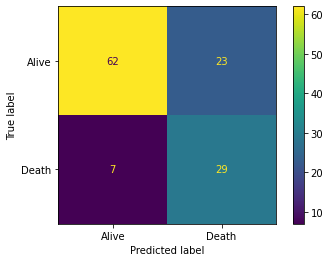

In [140]:
plot_confusion_matrix(clf_xgb3,
                      X_test, 
                      y_test, 
                      values_format='d',
                      display_labels=['Alive','Death'])

### 85 NMIBC patients who alived, 62 (73%) were correctly classified. And of the 36 NMIBC patients that deceased, 29 (81%) were correctly classified. So the XGBoost model was not awesomme. Part of the problem is that our data is imbalanced. We care about predicting who will die, we would like to capture mmore of the NMIBC patients that deceased.